In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('de_food_n_acc_1st_orders_v2.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128918 entries, 0 to 3128917
Data columns (total 27 columns):
SCM_N_ORDER_POS_NR              int64
SCM_N_ORDER_NR                  int64
TDT_T_KEY_ORDER_DATE            object
THR_C_KEY_ORDER_HOUR            object
SIT_N_KEY_SITE                  int64
CUS_N_KEY_CUSTOMER              int64
SCM_SALES_BMF                   object
SCM_SALES_CANCEL_BMF            object
SCM_D_FINANCE_CM1               object
SCM_D_FINANCE_CM2               object
SCM_D_ORIG_FINANCE_ORDER_NET    object
SCM_AP_ID                       int64
SCM_AS_ID                       int64
SCM_MASTER_AP_ID                int64
SCM_IS_ZSP_ORDER                int64
SCM_C_ORDER_STATUS              object
CTP_N_KEY_CUSTOMER_TYPE         int64
SCM_OCI_LAND                    object
SCM_D_FC_ID                     int64
SCM_D_PC_DSP                    int64
SCM_FC_SPLIT                    int64
OSP_KO_COUNT                    int64
OSP_KO_COUNT_NET                int64
OSP_

In [4]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [5]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [6]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [7]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [8]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [9]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [10]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [13]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [14]:
# let's convert inf and -inf into NA so that they are excluded when calculating the mean
data['REL_CM2'] = data['REL_CM2'].replace(np.inf, np.nan).replace(-np.inf, np.nan)

In [15]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

Let's get PG3 & PG4 short_link names from our DB to make data more readable...

In [16]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [17]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')')

In [18]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [19]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [20]:
pg3['PG_SHORTLINK_ID'] = pg3['PG_SHORTLINK'] + '_' + pg3['PG_ID'].astype(str)

In [21]:
len(set(pg3['PG_ID'])), len(set(pg3['PG_SHORTLINK_ID']))

(67, 67)

In [22]:
pg3

,PG_ID,PG_SHORTLINK,PG_SHORTLINK_ID
0,9,hundebett,hundebett_9
1,15,hundeleine_hundehalsband,hundeleine_hundehalsband_15
2,16,fressnapf,fressnapf_16
3,18,hundesnacks,hundesnacks_18
4,20,hundespielzeug,hundespielzeug_20
5,23,kratzbaum_katzenbaum,kratzbaum_katzenbaum_23
6,29,katzentoilette,katzentoilette_29
7,33,fressnapf,fressnapf_33
8,34,katzensnacks,katzensnacks_34
9,36,katzenspielzeug,katzenspielzeug_36


In [23]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK_ID'])}

In [24]:
pg3_dict[0] = 'null'

In [25]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [26]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(3128918, 3128918)

In [27]:
data['LEAD_PG3_NAME'] = lista_pg3

In [28]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [29]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')')

In [30]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [31]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [32]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [33]:
pg4_dict[-1] = 'null'

In [34]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [35]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(3128918, 3128918)

In [36]:
data['LEAD_PG4_NAME'] = lista_pg4

In [37]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
371748,40023.0,hundebekleidung_hundemantel_40023,40193.0,hundemantel
1192108,42.0,kaefigzubehoer_42,146.0,schlafhaeuschen
2589075,251.0,hundefutter_trockenfutter_251,2051.0,markus_muehle
2241416,15.0,hundeleine_hundehalsband_15,94.0,nylonleinen
288148,9.0,hundebett_9,75.0,hundekissen


In [38]:
first_orders = data[data['OSP_KO_COUNT_NET'] == 1]

In [39]:
cus_pg3_1st = {}

for i in first_orders['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = first_orders[first_orders['CUS_N_KEY_CUSTOMER'] == i]
    cus_pg3_1st[i] = cus_data['LEAD_PG3_NAME'].iloc[0]

In [40]:
cus_pg3_1st

{9575789: 'fressnapf_33',
 11895491: 'fressnapf_33',
 12834150: 'katzenfutter_trockenfutter_252',
 17247726: 'hundefutter_trockenfutter_251',
 17114244: 'ungezieferschutz_207553',
 17148622: 'katzentoilette_29',
 17270572: 'katzenfutter_trockenfutter_252',
 17356454: 'hundefutter_trockenfutter_251',
 16981764: 'katzenfutter_trockenfutter_252',
 17142248: 'katzenstreu_301',
 17254634: 'transport_37',
 16981491: 'hundefutter_nassfutter_857',
 17097389: 'katzenfutter_dose_2068',
 16996594: 'ungezieferschutz_207553',
 16981304: 'katzenfutter_dose_2068',
 16981223: 'futter_45',
 16981149: 'hundefutter_nassfutter_857',
 16996571: 'ungezieferschutz_207553',
 17254613: 'hundefutter_trockenfutter_251',
 16980354: 'katzenfutter_dose_2068',
 16996629: 'katzentoilette_29',
 17199834: 'kaefigzubehoer_42',
 16980347: 'balkon_garten_2155',
 16979835: 'fischfutter_62',
 16980149: 'kratzbaum_katzenbaum_23',
 16979429: 'hundesnacks_18',
 17198298: 'katzenfutter_dose_2068',
 16978290: 'hundeleine_hundeha

In [41]:
cus_pg3_1st_list = [cus_pg3_1st[i] for i in data['CUS_N_KEY_CUSTOMER'].values]

In [42]:
len(data['CUS_N_KEY_CUSTOMER']) == len(cus_pg3_1st_list)

True

In [43]:
data['LEAD_PG3_1ST_ORD'] = cus_pg3_1st_list

In [44]:
cm2_pg3_to_pg4 = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE', 'CUS_N_KEY_CUSTOMER', 
                                   'OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 
                                   'LEAD_PG3_1ST_ORD'], as_index=False).agg({'SCM_D_FINANCE_CM2': 'sum',
                                                                        'OSP_KO_COUNT_NET': 'mean',
                                                                            'REL_CM2': 'sum',
                                                                            'SCM_D_ORIG_FINANCE_ORDER_NET':'sum'})

In [45]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
386649,99005189,2017-11-23,18064552,2068.0,katzenfutter_dose_2068,2127.0,almo_nature,katzenfutter_trockenfutter_252,0.5962,3,1.934891,30.8131
578752,105873334,2018-03-04,18646179,252.0,katzenfutter_trockenfutter_252,13291.0,josera,kratzbaum_katzenbaum_23,4.1901,2,21.530754,19.4610
515998,102386459,2018-01-12,18754804,2068.0,katzenfutter_dose_2068,2127.0,almo_nature,katzenfutter_dose_2068,-0.8458,2,-1.742401,48.5422
199733,94511625,2017-09-16,17825116,2068.0,katzenfutter_dose_2068,2069.0,animonda_rafine,transport_37,-0.1203,2,-0.423660,28.3954
538329,103465299,2018-01-28,17209980,42.0,kaefigzubehoer_42,905.0,haengematte,transport_37,6.6308,4,33.265773,19.9328
310413,97245476,2017-10-28,18352745,207553.0,ungezieferschutz_207553,207617.0,spoton,ungezieferschutz_207553,-2.3248,1,-10.404350,22.3445
618715,109140358,2018-04-21,18803816,251.0,hundefutter_trockenfutter_251,2051.0,markus_muehle,hundefutter_trockenfutter_251,6.1130,2,11.182965,54.6635
650269,112825988,2018-06-15,18362387,2068.0,katzenfutter_dose_2068,9498.0,sheba,katzenfutter_dose_2068,12.1911,4,11.483801,106.1591
371573,98657395,2017-11-19,18573220,9.0,hundebett_9,74.0,decken,hundebett_9,6.1396,1,19.241811,31.9076
417158,99699758,2017-12-03,17720683,2068.0,katzenfutter_dose_2068,218624.0,royal_canin_veterinary_diet_feline_nassfutter,katzenfutter_dose_2068,10.8521,3,15.284648,71.0000


In [46]:
cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'].unique()

array(['fressnapf_33', 'katzenfutter_dose_2068',
       'hundefutter_trockenfutter_251', 'freigehege_49828',
       'katzenfutter_trockenfutter_252', 'hundetransportbox_2190',
       'hundehuette_hundetuer_2192', 'hundebett_9', 'kaefigzubehoer_42',
       'balkon_garten_2155', 'kratzbaum_katzenbaum_23',
       'hundeleine_hundehalsband_15', 'katzentoilette_29', 'kaefig_758',
       'hundepflege_409', 'ungezieferschutz_207553', 'hundespielzeug_20',
       'sport_training_153317', 'katzensnacks_34',
       'ungezieferschutz_207624', 'transport_37', 'futter_45',
       'aquarium_pflanzen_65', 'katzenbetten_katzenkissen_1540',
       'hundesnacks_18', 'katzenspielzeug_36',
       'pferdefutter_ergaenzungsfutter_1106', 'katzenstreu_301',
       'hundefutter_nassfutter_857', 'heu_streu_305',
       'aquarium_zubehoer_1635', 'vogelfutter_221', 'aquarium_2471',
       'kaninchenstaelle_49821', 'fischfutter_62',
       'katzenfutter_ergaenzung_38', 'futter_ergaenzung_401',
       'geschenkgutsc

In [47]:
crosstab_ko_count_net = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int)

In [48]:
crosstab_ko_count_net

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
aquarium_2471,931,275,121,69,42
aquarium_dekoration_484,625,142,43,24,17
aquarium_pflanzen_65,1166,282,117,63,34
aquarium_pumpen_67,1096,220,102,59,37
aquarium_zubehoer_1635,565,114,28,15,6
balkon_garten_2155,3654,1127,631,439,333
barf_183134,803,445,312,243,192
beleuchtung_486,736,148,49,18,13
einstreu_470,63,23,10,6,5


In [49]:
cm2_pg3_to_pg4[cm2_pg3_to_pg4['CUS_N_KEY_CUSTOMER'] == 18764637]

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
431405,100040079,2017-12-07,18764637,23.0,kratzbaum_katzenbaum_23,2061.0,kratzbaum_gross,kratzbaum_katzenbaum_23,11.1199,1,12.278947,90.5607
541454,103630786,2018-01-30,18764637,29.0,katzentoilette_29,2071.0,felix,kratzbaum_katzenbaum_23,5.7717,2,12.139958,47.5430
615817,108880181,2018-04-17,18764637,2068.0,katzenfutter_dose_2068,218624.0,royal_canin_veterinary_diet_feline_nassfutter,kratzbaum_katzenbaum_23,7.2158,3,23.145368,31.1760
622093,109465052,2018-04-26,18764637,1540.0,katzenbetten_katzenkissen_1540,43533.0,katzenhaus,kratzbaum_katzenbaum_23,7.4120,4,19.339856,38.3250
633489,110713503,2018-05-15,18764637,252.0,katzenfutter_trockenfutter_252,31963.0,hills_prescription_diet,kratzbaum_katzenbaum_23,2.3483,5,10.542643,22.2743


In [50]:
next_orders = cm2_pg3_to_pg4[cm2_pg3_to_pg4['OSP_KO_COUNT_NET'] != 1]

In [51]:
crosstab_pg3_to_pg4_orders = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [52]:
crosstab_pg3_to_pg4_orders

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,alle_hundenaepfe,alle_produkte,alle_zubehoerartikel,...,zoolove,zoolove_snacks,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zubehoer,zusatzfutter,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.00,0.00,0.00,0.00,0.00,0.79,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.20
aquarium_dekoration_484,0.00,0.00,0.00,0.00,0.00,0.00,0.88,0.0,0.00,0.00,...,0.00,0.00,0.88,0.00,0.0,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen_65,0.00,0.00,0.00,0.00,0.00,0.00,1.81,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.81
aquarium_pumpen_67,0.00,0.00,0.00,0.00,0.00,0.00,1.20,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.24,0.00,0.00,1.20
aquarium_zubehoer_1635,0.00,0.00,0.00,0.00,0.00,0.00,1.84,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.23
balkon_garten_2155,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.12
barf_183134,0.00,0.59,7.80,0.00,0.00,0.08,0.00,0.0,0.00,0.00,...,0.00,0.00,0.17,0.00,0.0,0.08,0.00,0.00,0.00,0.25
beleuchtung_486,0.00,0.44,0.00,0.00,0.00,0.00,3.51,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.27,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [53]:
crosstab_pg3_to_pg4_orders.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance_veterinary_diets',
       'affinity_ultima', 'agility', 'algenbekaempfung',
       'alle_hundenaepfe', 'alle_produkte', 'alle_zubehoerartikel',
       'almo_nature', 'almo_nature_holistic', 'almo_nature_labels',
       'alpha_natural', 'alpha_spirit', 'animonda', 'animonda_rafine',
       'animonda_rafinee', 'antizug_maulkorb', 'anubias_wasserpflanzen',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarien_rueckwaende', 'aquarienkies',
       'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohren', 'augen_ohrenpflege',
       'augenpflege', 'aussergewoehnliche_katzenbetten',
       'autoschondecken', 'autoschutzgitter', 'bade_sand', 'badehaeuser',
       'baelle', 'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten'

In [54]:
pg4_selection = [i for i in crosstab_pg3_to_pg4_orders.columns if (crosstab_pg3_to_pg4_orders[i] > 5).any()]

In [55]:
len(pg4_selection)

94

In [56]:
np.array(pg4_selection)

array(['adult', 'animonda', 'animonda_rafine', 'antizug_maulkorb',
       'aquarien_komplett', 'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_zubehoer', 'autoschondecken', 'bade_sand', 'bosch',
       'briantos', 'cats_best', 'cellulose_einstreu', 'co3',
       'einbautueren', 'erziehungshalsband', 'flockenfutter',
       'frostfleisch_mixpakete', 'futterautomaten', 'futterpflanzen',
       'gefriergetrocknete_snacks', 'gelenke_knochen', 'geschirre',
       'golden_grey', 'grosssittich', 'halsband', 'hamster', 'hanfstreu',
       'happy_dog_premium', 'haut_fell', 'haut_haare', 'heu',
       'hills_prescription_diet', 'holzstreu', 'hundefutter_rocco',
       'hundefutter_wolf_of_wilderness', 'hundemantel', 'josera',
       'kanarie', 'katzenmilch', 'katzennetz',
       'katzenspielzeug_beschaeftigung', 'katzentraenke', 'kauknochen',
       'kausnacks_natur_vom_rind', 'kaustreifen',
       'knabberspass_und_knabberstangen', 'kong', 'laufraeder',
       'led_aquariumleuchten

In [57]:
crosstab_pg3_to_pg4_orders[pg4_selection]

LEAD_PG4_NAME,adult,animonda,animonda_rafine,antizug_maulkorb,aquarien_komplett,aquarium_aussenfilter,aquarium_filter,aquarium_zubehoer,autoschondecken,bade_sand,...,vitamine_mineralien,vogelsand,wasserpflege,wellensittich,whiskas_katzenfutter,wildvogelfutter,winterausstattung,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.39,0.20,0.20,13.02,1.78,3.16,5.33,0.00,0.00,...,0.00,0.00,3.94,0.59,0.00,0.20,0.00,0.00,0.00,0.20
aquarium_dekoration_484,0.00,0.44,0.00,0.00,1.33,1.77,2.21,2.65,0.00,0.00,...,0.00,0.00,3.54,0.00,0.44,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen_65,0.00,0.40,0.81,0.00,0.60,2.02,3.23,1.81,0.20,0.00,...,0.00,0.00,3.83,0.00,0.81,0.20,0.00,0.00,0.00,0.81
aquarium_pumpen_67,0.00,0.00,0.72,0.00,0.24,6.22,11.72,3.11,0.00,0.00,...,0.00,0.00,3.83,0.96,0.72,0.96,0.00,0.24,0.00,1.20
aquarium_zubehoer_1635,0.00,0.00,1.84,0.00,0.00,1.84,4.91,2.45,0.00,0.00,...,0.00,0.00,5.52,0.00,0.00,1.84,0.00,0.00,0.00,1.23
balkon_garten_2155,0.00,2.17,6.44,0.04,0.00,0.00,0.08,0.00,0.00,0.04,...,0.00,0.00,0.00,0.08,1.66,0.51,0.04,0.00,0.00,0.12
barf_183134,7.80,0.34,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.25
beleuchtung_486,0.00,0.44,1.75,0.00,0.44,0.88,3.95,1.32,0.00,0.00,...,0.00,0.00,2.63,0.00,0.00,0.44,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,22.73,0.00,25.00,0.00,9.09,0.00,0.00,0.00,0.00


In [58]:
crosstab_pg3_to_pg4_orders[pg4_selection].to_csv('de_rel_orders_lead_pg3_and_pg4_selection.csv', sep=';', index=True, encoding='utf-8')

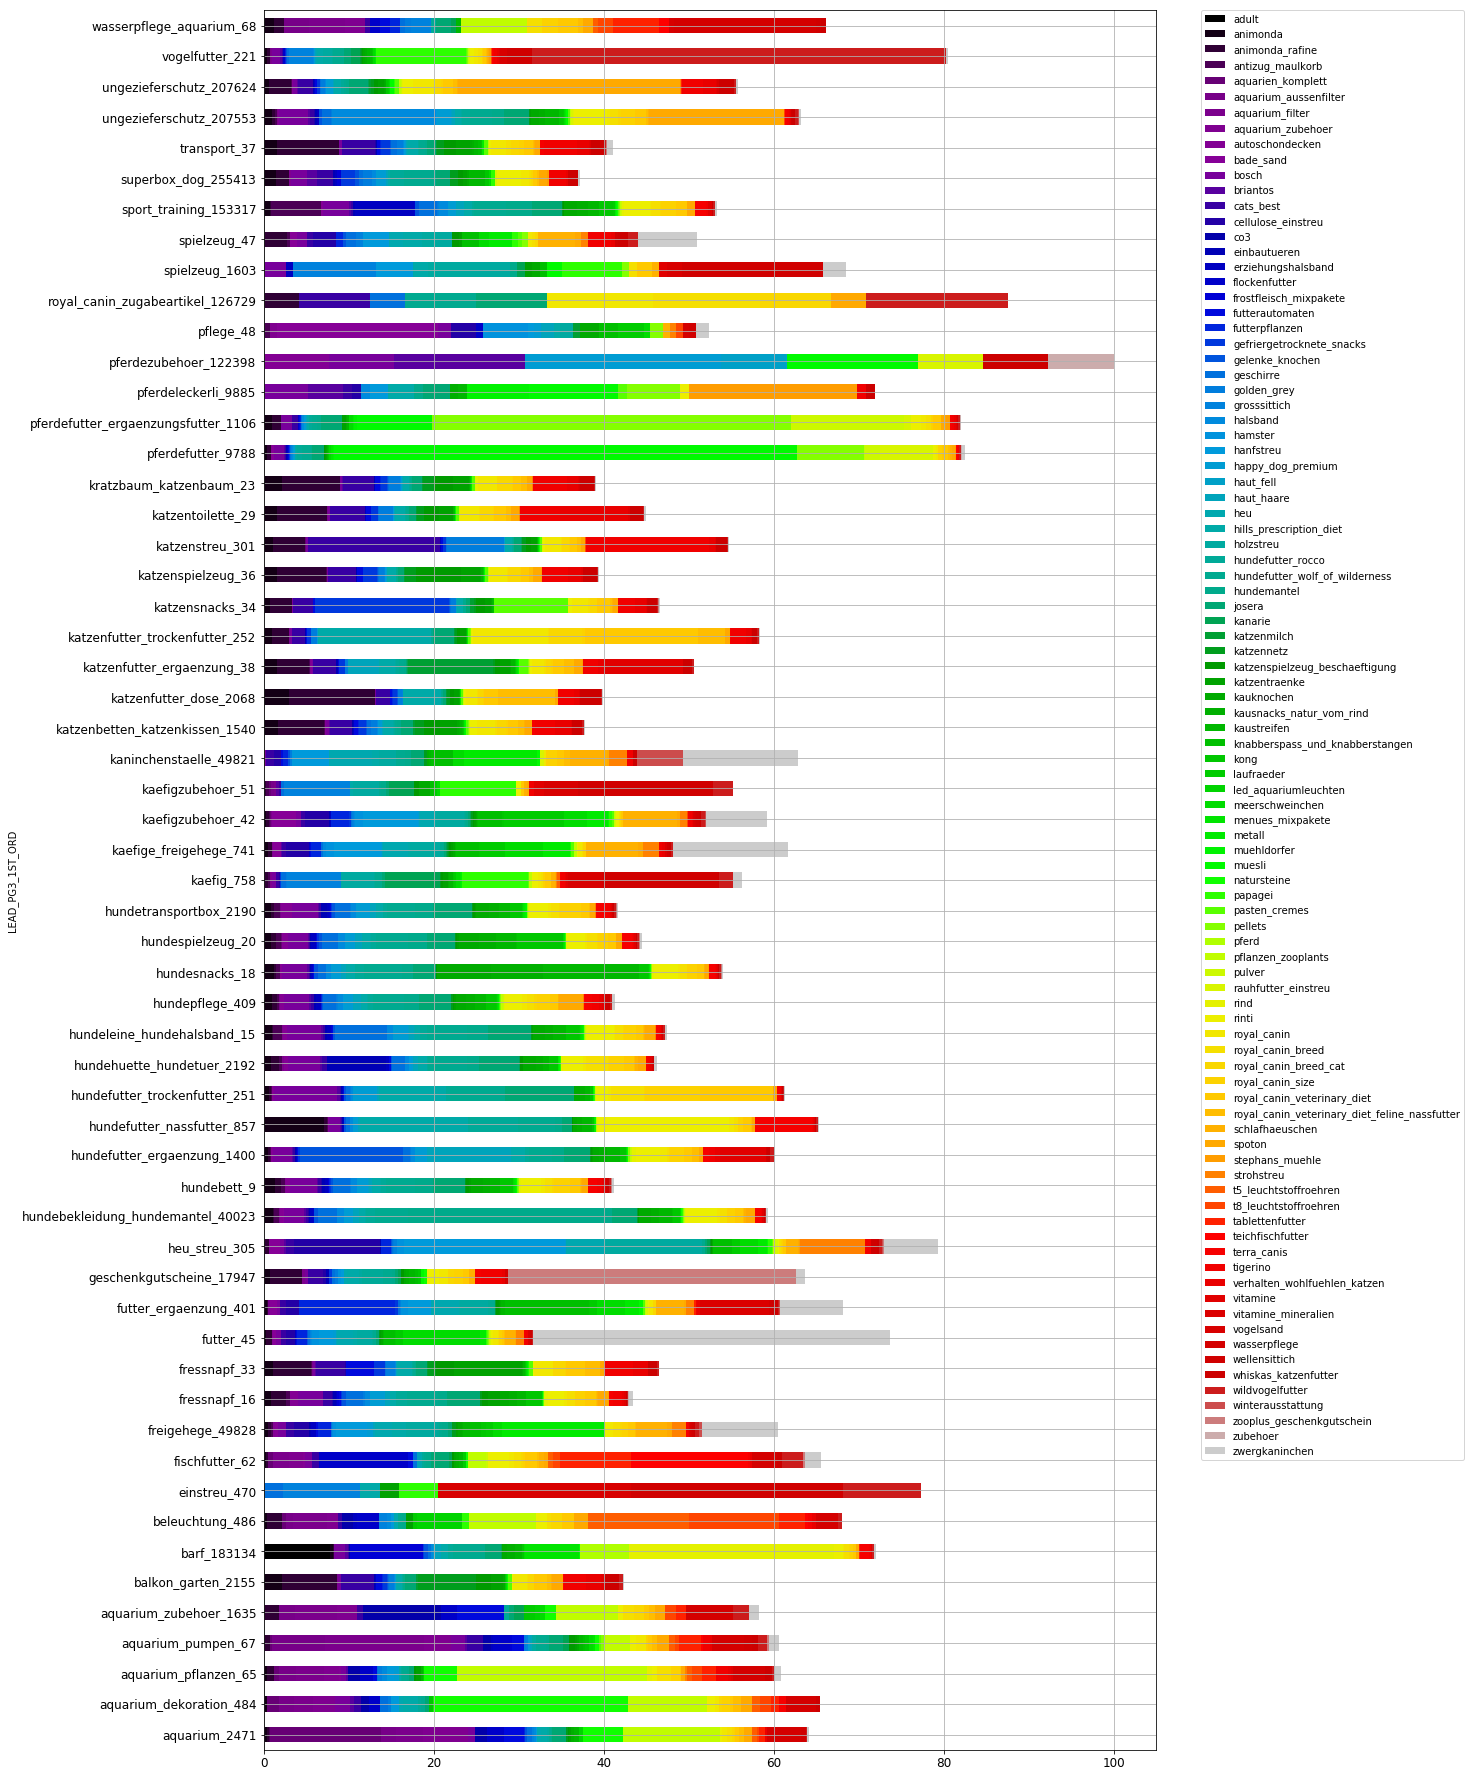

In [59]:
crosstab_pg3_to_pg4_orders[pg4_selection].plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
#plt.savefig('rel_orders_accesories_and_pg4_sel')

In [60]:
crosstab_pg3_to_pg4_cm2 = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).round(2)

In [61]:
crosstab_pg3_to_pg4_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
aquarium_2471,14618.63,2522.50,944.99,453.56,242.33
aquarium_dekoration_484,5145.17,997.93,332.85,192.55,154.61
aquarium_pflanzen_65,6461.03,1809.67,830.08,449.23,303.78
aquarium_pumpen_67,8493.13,1732.79,625.83,331.49,259.99
aquarium_zubehoer_1635,1586.99,632.58,175.38,85.58,25.45
balkon_garten_2155,35184.90,7787.40,4879.15,3114.56,2364.01
barf_183134,7394.36,4969.48,3554.57,2683.48,2268.76
beleuchtung_486,5111.10,909.47,257.34,80.78,64.83
einstreu_470,380.96,116.42,49.81,38.93,28.28


In [62]:
crosstab_pg3_to_pg4_perc_cm2 = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [63]:
crosstab_pg3_to_pg4_perc_cm2

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,alle_hundenaepfe,alle_produkte,alle_zubehoerartikel,...,zoolove,zoolove_snacks,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zubehoer,zusatzfutter,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.17
aquarium_dekoration_484,0.00,0.00,0.00,0.00,0.00,0.00,0.54,0.0,0.00,0.00,...,0.00,0.00,4.12,0.00,0.0,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen_65,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,3.06
aquarium_pumpen_67,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.76
aquarium_zubehoer_1635,0.00,0.00,0.00,0.00,0.00,0.00,1.23,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.57
balkon_garten_2155,0.00,0.47,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.17
barf_183134,0.00,1.08,12.85,0.00,0.00,0.29,0.00,0.0,0.00,0.00,...,0.00,0.00,0.34,0.00,0.0,0.03,0.00,0.00,0.00,0.02
beleuchtung_486,0.00,0.62,0.00,0.00,0.00,0.00,3.66,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3.11,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [64]:
crosstab_pg3_to_pg4_perc_cm2.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance_veterinary_diets',
       'affinity_ultima', 'agility', 'algenbekaempfung',
       'alle_hundenaepfe', 'alle_produkte', 'alle_zubehoerartikel',
       'almo_nature', 'almo_nature_holistic', 'almo_nature_labels',
       'alpha_natural', 'alpha_spirit', 'animonda', 'animonda_rafine',
       'animonda_rafinee', 'antizug_maulkorb', 'anubias_wasserpflanzen',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarien_rueckwaende', 'aquarienkies',
       'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohren', 'augen_ohrenpflege',
       'augenpflege', 'aussergewoehnliche_katzenbetten',
       'autoschondecken', 'autoschutzgitter', 'bade_sand', 'badehaeuser',
       'baelle', 'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten'

In [65]:
pg4_cm2_selection = [i for i in crosstab_pg3_to_pg4_perc_cm2.columns if (crosstab_pg3_to_pg4_perc_cm2[i] > 5).any()]

In [66]:
len(pg4_cm2_selection)

112

In [67]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection]

LEAD_PG4_NAME,adult,agility,aquarien_komplett,aquarium_aussenfilter,aquarium_filter,aquarium_unterschrank,autoschondecken,bade_sand,bosch,briantos,...,vogelsand,wasserpflege,weidenhoehlen,wellensittich,wildvogelfutter,winterausstattung,zooplus,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.00,22.86,2.12,2.29,6.72,0.00,0.00,0.37,0.00,...,0.00,1.46,0.58,0.02,0.02,0.00,0.00,0.00,0.00,0.17
aquarium_dekoration_484,0.00,0.00,2.54,6.05,0.54,0.54,0.00,0.00,1.76,0.18,...,0.00,0.79,0.00,0.00,0.00,0.00,4.12,0.00,0.00,0.00
aquarium_pflanzen_65,0.00,0.00,1.89,5.25,1.50,0.48,0.60,0.00,0.87,0.18,...,0.00,2.34,0.00,0.00,0.12,0.00,0.00,0.00,0.00,3.06
aquarium_pumpen_67,0.00,0.00,0.59,10.46,7.63,0.00,0.00,0.00,1.76,0.76,...,0.00,2.31,0.00,1.83,0.45,0.00,0.00,0.00,0.00,1.76
aquarium_zubehoer_1635,0.00,0.00,0.00,4.70,2.24,0.00,0.00,0.00,0.00,0.00,...,0.00,4.36,0.00,0.00,0.89,0.00,0.00,0.00,0.00,1.57
balkon_garten_2155,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.75,0.00,...,0.00,0.00,0.00,0.19,0.29,0.19,0.00,0.00,0.00,0.17
barf_183134,12.85,0.29,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.45,...,0.00,0.00,0.00,0.00,0.08,0.00,0.34,0.00,0.00,0.02
beleuchtung_486,0.00,0.00,0.55,4.13,1.56,0.00,0.00,0.00,0.00,0.00,...,0.00,2.26,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,24.89,0.00,0.00,33.33,5.78,0.00,0.00,0.00,0.00,0.00


In [68]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_csv('de_rel_cm2_lead_pg3_and_pg4_selection.csv', sep=';',
                                                      index=True, encoding='utf-8')

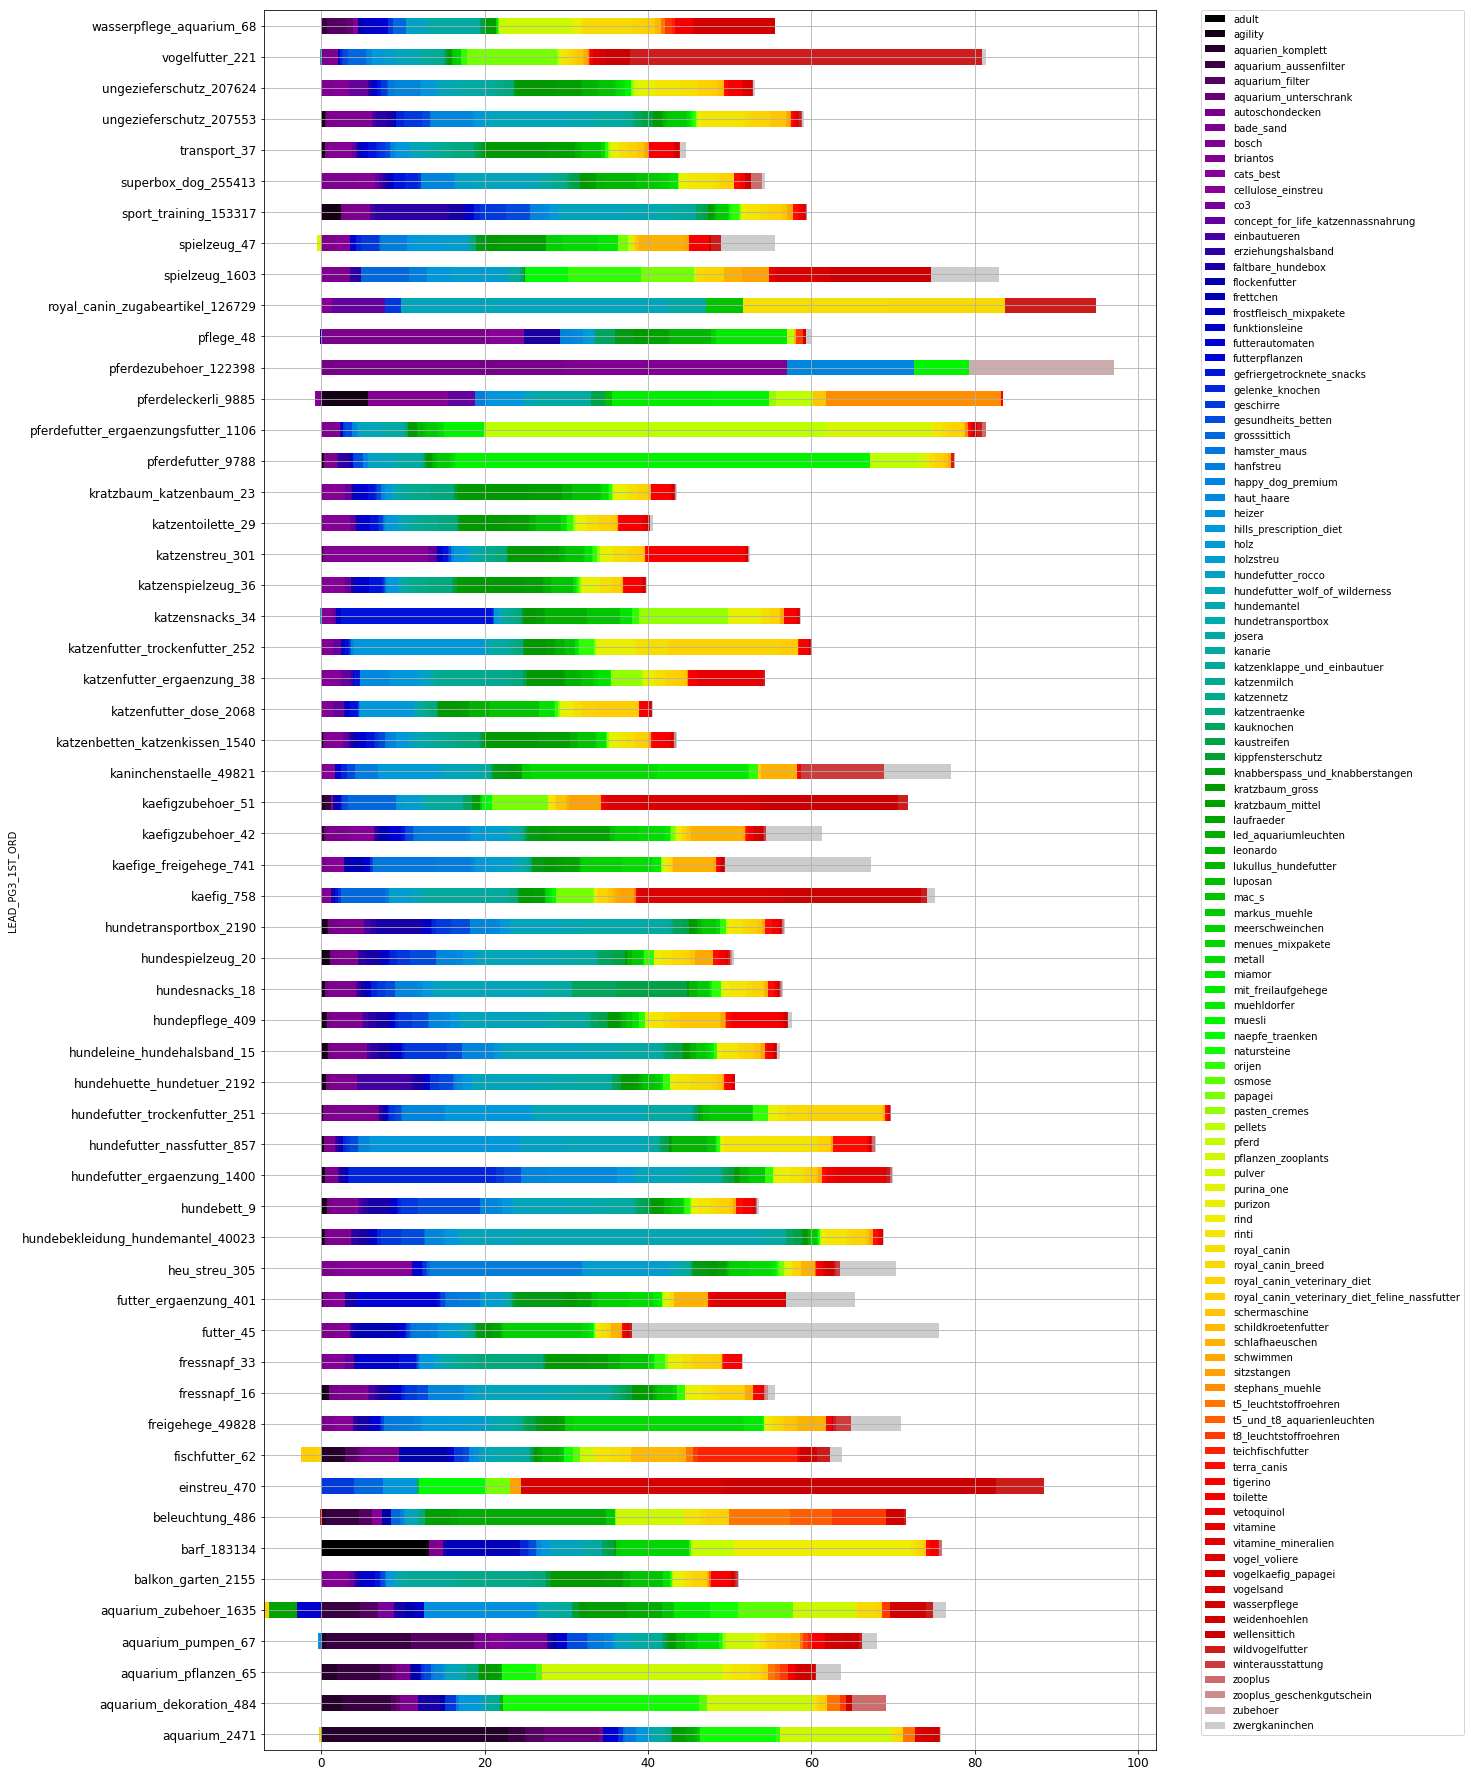

In [69]:
crosstab_pg3_to_pg4_perc_cm2[crosstab_pg3_to_pg4_perc_cm2.index != 'geschenkgutscheine_17947'][pg4_cm2_selection]\
.plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [70]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
208944,94748997,2017-09-19,17970141,251.0,hundefutter_trockenfutter_251,255.0,eukanuba,hundefutter_trockenfutter_251,3.1851,1,15.835160,20.1141
403140,99389299,2017-11-28,18519801,2190.0,hundetransportbox_2190,10623.0,hundezubehoer_auto,hundefutter_nassfutter_857,7.8808,2,30.242375,26.0588
30002,89439940,2017-06-22,17132802,252.0,katzenfutter_trockenfutter_252,3641.0,smilla,katzenfutter_trockenfutter_252,10.7643,1,18.918890,56.8971
498326,101552070,2018-01-01,18095750,29.0,katzentoilette_29,39925.0,exklusive_katzentoilette,kratzbaum_katzenbaum_23,22.3802,3,28.632106,78.1647
424712,99878206,2017-12-05,18425878,23.0,kratzbaum_katzenbaum_23,50014.0,kratzmoebel_wellpappe,katzenfutter_trockenfutter_252,3.1472,2,18.930299,16.6252
503375,101787259,2018-01-04,18718497,16.0,fressnapf_16,2238.0,napfstaender,hundetransportbox_2190,16.3374,3,34.983726,46.7000
232154,95359308,2017-09-29,18062041,484.0,aquarium_dekoration_484,547.0,aquarien_rueckwaende,aquarium_dekoration_484,5.3740,1,12.546723,42.8319
289654,96764122,2017-10-21,18280278,251.0,hundefutter_trockenfutter_251,528.0,happy_dog_premium,hundefutter_trockenfutter_251,26.7429,1,23.366714,114.4487
503496,101793817,2018-01-04,18547545,301.0,katzenstreu_301,10331.0,tigerino,hundefutter_trockenfutter_251,5.8995,5,3.253703,181.3165
229322,95283798,2017-09-28,18008745,42.0,kaefigzubehoer_42,2276.0,tunnel_hoehlen,kaefigzubehoer_42,2.2696,2,13.377501,16.9658


In [71]:
cm2_pg3_to_pg4['REL_CM2'].describe()

count    6.522620e+05
mean    -6.473034e+13
std      3.002203e+16
min     -9.331458e+18
25%      7.288006e+00
50%      1.539256e+01
75%      2.293739e+01
max      6.617803e+18
Name: REL_CM2, dtype: float64

As we have some orders with net_sales = 0, CM2% becames extremely high or low and can lead us into trouble when calculating the CM2% on average per Lead PG4

In [72]:
cm2_pg3_to_pg4_subset = cm2_pg3_to_pg4[cm2_pg3_to_pg4['SCM_D_ORIG_FINANCE_ORDER_NET'] >= 1]

In [73]:
next_orders_subset = cm2_pg3_to_pg4_subset[cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'] != 1]

In [74]:
pg3_orders_count_net_cm2 = pd.crosstab(cm2_pg3_to_pg4_subset['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [75]:
pg3_orders_count_net_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
aquarium_2471,8.42,12.80,15.36,12.64,12.50
aquarium_dekoration_484,16.96,16.74,14.36,15.73,16.75
aquarium_pflanzen_65,10.51,16.24,16.28,14.60,19.02
aquarium_pumpen_67,7.64,13.97,13.63,14.78,15.76
aquarium_zubehoer_1635,4.26,7.54,-84.19,14.47,10.74
balkon_garten_2155,25.37,15.58,14.09,16.24,14.89
barf_183134,7.50,16.23,18.24,17.19,17.79
beleuchtung_486,11.59,14.49,10.34,12.13,10.58
einstreu_470,26.99,17.78,19.37,29.06,24.94


In [76]:
crosstab_pg3_to_pg4_rel_cm2 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [77]:
crosstab_pg3_to_pg4_rel_cm2

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,alle_hundenaepfe,alle_produkte,alle_zubehoerartikel,...,zoolove,zoolove_snacks,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zubehoer,zusatzfutter,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.00,0.00,0.0,0.00,0.00,8.81,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.30
aquarium_dekoration_484,0.00,0.00,0.00,0.0,0.00,0.00,20.62,0.00,0.00,0.00,...,0.00,0.00,37.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen_65,0.00,0.00,0.00,0.0,0.00,0.00,17.06,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.07
aquarium_pumpen_67,0.00,0.00,0.00,0.0,0.00,0.00,5.18,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.75
aquarium_zubehoer_1635,0.00,0.00,0.00,0.0,0.00,0.00,20.16,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.40
balkon_garten_2155,0.00,26.95,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.75
barf_183134,0.00,26.26,24.48,0.0,0.00,46.67,0.00,0.00,0.00,0.00,...,0.00,0.00,38.16,0.00,0.00,22.91,0.00,0.00,0.00,1.58
beleuchtung_486,0.00,19.54,0.00,0.0,0.00,0.00,23.11,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,39.76,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [78]:
crosstab_pg3_to_pg4_rel_cm2.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance_veterinary_diets',
       'affinity_ultima', 'agility', 'algenbekaempfung',
       'alle_hundenaepfe', 'alle_produkte', 'alle_zubehoerartikel',
       'almo_nature', 'almo_nature_holistic', 'almo_nature_labels',
       'alpha_natural', 'alpha_spirit', 'animonda', 'animonda_rafine',
       'animonda_rafinee', 'antizug_maulkorb', 'anubias_wasserpflanzen',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarien_rueckwaende', 'aquarienkies',
       'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohren', 'augen_ohrenpflege',
       'augenpflege', 'aussergewoehnliche_katzenbetten',
       'autoschondecken', 'autoschutzgitter', 'bade_sand', 'badehaeuser',
       'baelle', 'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten'

In [79]:
pg4_rel_cm2_selection = [i for i in crosstab_pg3_to_pg4_rel_cm2.columns if (crosstab_pg3_to_pg4_rel_cm2[i] < 0).any()]

In [80]:
len(pg4_rel_cm2_selection)

259

In [81]:
np.array(pg4_rel_cm2_selection)

array(['alle_zubehoerartikel', 'almo_nature', 'almo_nature_holistic',
       'animonda', 'animonda_rafine', 'antizug_maulkorb', 'applaws',
       'applaws_katzenfutter', 'aquarien_komplett',
       'aquarien_rueckwaende', 'aquarienkies', 'aquarium_aussenfilter',
       'aquarium_unterschrank', 'aquarium_zubehoer', 'augen_ohren',
       'bade_sand', 'baelle', 'baldrian_katzenspielzeug',
       'barkoo_kausnacks', 'belcando', 'beyond_katzen', 'biokats',
       'bodengrund', 'bosch', 'bozita', 'brekkies',
       'brekkies_katzenfutter', 'briantos', 'buersten', 'catessy',
       'catnip_spielzeug', 'cats_best', 'catsan', 'catz_finefood',
       'cellulose_einstreu', 'cesar', 'chinchilla', 'clicker_pfeife',
       'cosma', 'decken', 'deckenspanner', 'degu', 'deo_geruchsbinder',
       'doppelstoeckig', 'dreamies_snack', 'drops_leckerli', 'earthborn',
       'edelstahl', 'einzeldosen_probieren', 'erziehungshalsband',
       'eukanuba', 'exklusive_katzentoilette', 'extreme_classic',
       'f

In [82]:
pd.options.display.float_format = '{:.2f}'.format
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection]

LEAD_PG4_NAME,alle_zubehoerartikel,almo_nature,almo_nature_holistic,animonda,animonda_rafine,antizug_maulkorb,applaws,applaws_katzenfutter,aquarien_komplett,aquarien_rueckwaende,...,whiskas_katzenfutter,wildvogel,wuerste_fleischbaellchen,wurzeln_aquarium,yarrah,zahngesundheit,zahnpflege,zahnpflege_snacks,zoolove,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium_2471,0.00,0.00,0.00,2.76,-1.41,10.97,7.97,0.00,14.48,22.73,...,0.00,0.00,0.00,29.14,0.00,0.00,0.00,-4.31,0.00,19.30
aquarium_dekoration_484,0.00,0.00,0.00,8.38,0.00,0.00,0.00,0.00,16.75,2.11,...,20.45,0.00,0.00,18.24,0.00,0.00,0.00,-9.16,0.00,0.00
aquarium_pflanzen_65,0.00,0.00,0.00,2.48,5.99,0.00,10.42,0.00,17.77,-34.41,...,7.93,0.00,0.00,21.24,0.00,0.00,0.00,0.00,0.00,22.07
aquarium_pumpen_67,0.00,0.00,0.00,0.00,10.92,0.00,12.72,0.00,14.62,-5.84,...,3.08,0.00,0.00,16.55,0.00,0.00,0.00,0.00,0.00,21.75
aquarium_zubehoer_1635,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.40
balkon_garten_2155,0.00,7.54,0.00,12.98,4.76,31.56,6.57,21.80,0.00,0.00,...,6.86,0.00,0.00,0.00,16.31,0.00,0.00,0.00,0.00,17.75
barf_183134,0.00,18.63,0.00,18.37,15.95,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,12.96,9.66,0.00,1.58
beleuchtung_486,0.00,0.00,0.00,19.15,9.29,0.00,0.00,0.00,8.29,0.00,...,0.00,0.00,0.00,20.78,0.00,0.00,0.00,0.00,0.00,0.00
einstreu_470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [83]:
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_csv('de_relative_cm2_lead_pg3_and_pg4_selection.csv',
                                                          sep=';', index=True, encoding='utf-8')

In [84]:
pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

LEAD_PG4_NAME                       _lampen        acana       adult        \
                                        len  mean    len  mean   len  mean   
LEAD_PG3_1ST_ORD                                                             
aquarium_2471                          0.00  0.00   0.00  0.00  0.00  0.00   
aquarium_dekoration_484                0.00  0.00   0.00  0.00  0.00  0.00   
aquarium_pflanzen_65                   0.00  0.00   0.00  0.00  0.00  0.00   
aquarium_pumpen_67                     0.00  0.00   0.00  0.00  0.00  0.00   
aquarium_zubehoer_1635                 0.00  0.00   0.00  0.00  0.00  0.00   
balkon_garten_2155                     0.00  0.00   3.00 26.95  0.00  0.00   
barf_183134                            0.00  0.00   7.00 26.26 93.00 24.48   
beleuchtung_486                        0.00  0.00   1.00 19.54  0.00  0.00   
einstreu_470                           0.00  0.00   0.00  0.00  0.00  0.00   
fischfutter_62                         0.00  0.00   0.00  0.00  0.00  0.00   
freigehege_49828                       0.00  0.00   2.00 17.85  0.00  0.00   
fressnapf_16                           0.00  0.00   2.00 33.10  1.00 23.74   
fressnapf_33                           0.00  0.00   7.00 19.37  0.00  0.00   
futter_45                              0.00  0.00   0.00  0.00  0.00  0.00   
futter_ergaenzung_401                  0.00  0.00   0.00  0.00  0.00  0.00   
geschenkgutscheine_17947               0.00  0.00   0.00  0.00  0.00  0.00   
heu_streu_305                          0.00  0.00   1.00 14.97  0.00  0.00   
hundebekleidung_hundemantel_40023      0.00  0.00  10.00 21.68  5.00 16.95   
hundebett_9                            1.00 20.92  30.00 27.72  6.00 19.05   
hundefutter_ergaenzung_1400            0.00  0.00   3.00 13.42  1.00 32.36   
hundefutter_nassfutter_857             0.00  0.00  38.00 21.93 17.00 19.36   
hundefutter_trockenfutter_251          0.00  0.00 578.00 24.53 11.00 14.75   
hundehuette_hundetuer_2192             0.00  0.00   2.00 16.99  1.00 19.91   
hundeleine_hundehalsband_15            0.00  0.00  11.00 23.08  1.00 17.04   
hundepflege_409                        0.00  0.00   2.00 28.00  5.00 15.67   
hundesnacks_18                         0.00  0.00  15.00 26.80  4.00 16.56   
hundespielzeug_20                      0.00  0.00  15.00 25.78  4.00 24.49   
hundetransportbox_2190                 0.00  0.00  49.00 26.10  4.00 26.56   
kaefig_758                             9.00 13.36   0.00  0.00  0.00  0.00   
kaefige_freigehege_741                 0.00  0.00   0.00  0.00  0.00  0.00   
kaefigzubehoer_42                      2.00 24.87   0.00  0.00  1.00 29.96   
kaefigzubehoer_51                      8.00 13.09   0.00  0.00  0.00  0.00   
kaninchenstaelle_49821                 0.00  0.00   1.00 37.64  0.00  0.00   
katzenbetten_katzenkissen_1540         0.00  0.00   6.00 25.46  1.00  3.47   
katzenfutter_dose_2068                 1.00  6.65  60.00 21.40  2.00 17.80   
katzenfutter_ergaenzung_38             0.00  0.00   2.00 26.70  0.00  0.00   
katzenfutter_trockenfutter_252         0.00  0.00 162.00 22.95  0.00  0.00   
katzensnacks_34                        0.00  0.00   3.00 18.91  0.00  0.00   
katzenspielzeug_36                     0.00  0.00   3.00 26.84  0.00  0.00   
katzenstreu_301                        0.00  0.00  19.00 21.25  1.00 15.48   
katzentoilette_29                      2.00 18.77  11.00 24.87  0.00  0.00   
kratzbaum_katzenbaum_23                1.00 12.96  29.00 21.22  0.00  0.00   
pferdefutter_9788                      0.00  0.00   0.00  0.00  1.00 28.75   
pferdefutter_ergaenzungsfutter_1106    0.00  0.00   0.00  0.00  0.00  0.00   
pferdeleckerli_9885                    0.00  0.00   0.00  0.00  0.00  0.00   
pferdezubehoer_122398                  0.00  0.00   0.00  0.00  0.00  0.00   
pflege_48                              0.00  0.00   0.00  0.00  0.00  0.00   
royal_canin_zugabeartikel_126729       0.00  0.00   0.00  0.00  0.00  0.00   
spielzeug_1603        

In [85]:
ord_cm2_crosstab_pg4 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

In [86]:
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_csv('de_n_ord_avg_cm2_per_pg4.csv',
                                                  sep=';', index=True, encoding='utf-8')

In [87]:
neg_brands = []

for i in ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].columns.levels[0]:
    for j in list(zip(ord_cm2_crosstab_pg4[i]['len'], ord_cm2_crosstab_pg4[i]['mean'])):
        if (j[0] > 10 and j[1] < 0):
            neg_brands.append(i)

In [88]:
set_neg_brands = list(set(neg_brands))

In [89]:
set_neg_brands

['frolic',
 'faltbare_hundebox',
 'tabletten',
 'kratzspielzeug',
 'granatapet',
 'golden_grey',
 'extreme_classic',
 'sicherheitsbekleidung',
 'whiskas_katzenfutter',
 'quietschies',
 'holzstreu',
 'wuerste_fleischbaellchen',
 'baldrian_katzenspielzeug',
 'sanicat',
 'spoton',
 'deo_geruchsbinder',
 'natusan',
 'applaws_katzenfutter',
 'pellets',
 'catessy',
 'kitekat',
 'kunststoff',
 'animonda',
 'whiskas',
 'pure_feline',
 'grosssittich',
 'hundekorb',
 'napfunterlagen',
 'hygienebetten',
 'keramik',
 'hundezubehoer_auto',
 'baelle',
 'deckenspanner',
 'catsan',
 'spray',
 'earthborn',
 'nester_grashaeuser',
 'heu',
 'halsband',
 'katzenspielzeug_beschaeftigung',
 'animonda_rafine',
 'jogging',
 'hundefutter_wolf_of_wilderness',
 'kamm_buerste',
 'terra_felis',
 'pro_plan',
 'my_star']

In [90]:
ord_cm2_crosstab_pg4[set_neg_brands]

LEAD_PG4_NAME                       frolic        faltbare_hundebox         \
                                       len   mean               len   mean   
LEAD_PG3_1ST_ORD                                                             
aquarium_2471                         0.00   0.00              0.00   0.00   
aquarium_dekoration_484               0.00   0.00              2.00  40.28   
aquarium_pflanzen_65                  0.00   0.00              1.00  24.28   
aquarium_pumpen_67                    0.00   0.00              1.00  35.11   
aquarium_zubehoer_1635                0.00   0.00              2.00  17.59   
balkon_garten_2155                    1.00   0.38              3.00  27.75   
barf_183134                           1.00  28.13              6.00  20.70   
beleuchtung_486                       1.00   5.30              0.00   0.00   
einstreu_470                          0.00   0.00              0.00   0.00   
fischfutter_62                        0.00   0.00              0.00   0.00   
freigehege_49828                      1.00 -73.81             12.00  21.70   
fressnapf_16                          1.00   8.03             11.00  22.15   
fressnapf_33                          0.00   0.00              2.00  21.49   
futter_45                             1.00  25.56              5.00  22.13   
futter_ergaenzung_401                 0.00   0.00              3.00  30.25   
geschenkgutscheine_17947              0.00   0.00              3.00   9.71   
heu_streu_305                         0.00   0.00              1.00  30.01   
hundebekleidung_hundemantel_40023     0.00   0.00             39.00  20.52   
hundebett_9                           6.00  -2.45            175.00  22.85   
hundefutter_ergaenzung_1400           0.00   0.00             12.00  18.02   
hundefutter_nassfutter_857            4.00   8.50             74.00  20.73   
hundefutter_trockenfutter_251        47.00  -1.78            209.00  23.24   
hundehuette_hundetuer_2192            0.00   0.00             12.00  26.45   
hundeleine_hundehalsband_15           3.00  16.92             58.00 -21.30   
hundepflege_409                       4.00   0.59             36.00  20.19   
hundesnacks_18                        6.00  12.51             26.00  16.56   
hundespielzeug_20                     2.00   1.07             43.00  24.77   
hundetransportbox_2190                0.00   0.00            513.00  21.11   
kaefig_758                            0.00   0.00              1.00  35.00   
kaefige_freigehege_741                1.00   8.08              1.00  35.29   
kaefigzubehoer_42                     0.00   0.00              7.00  27.14   
kaefigzubehoer_51                     0.00   0.00              1.00  21.46   
kaninchenstaelle_49821                1.00  -0.65              0.00   0.00   
katzenbetten_katzenkissen_1540        0.00   0.00             13.00  22.42   
katzenfutter_dose_2068                6.00  -3.99             30.00  22.62   
katzenfutter_ergaenzung_38            0.00   0.00              0.00   0.00   
katzenfutter_trockenfutter_252        3.00   2.71             26.00  17.23   
katzensnacks_34                       0.00   0.00              0.00   0.00   
katzenspielzeug_36                    0.00   0.00             15.00  22.11   
katzenstreu_301                       4.00  -2.29             14.00  19.87   
katzentoilette_29                     1.00  15.12             11.00  21.43   
kratzbaum_katzenbaum_23               0.00   0.00             41.00  21.07   
pferdefutter_9788                     0.00   0.00              2.00  23.43   
pferdefutter_ergaenzungsfutter_1106   0.00   0.00              1.00  20.85   
pferdeleckerli_9885                   0.00   0.00              0.00   0.00   
pferdezubehoer_122398                 0.00   0.00              0.00   0.00   
pflege_48                             0.00   0.00              2.00  26.82   
royal_canin_zugabeartikel_126729      0.00   0.00              0.00   0.00   
spielzeug_1603        

In [91]:
ord_cm2_crosstab_pg4[set_neg_brands].to_csv('de_set_neg_brands.csv', sep=';', index=True, encoding='utf-8')

In [92]:
next_orders_subset.groupby('LEAD_PG4_NAME')['REL_CM2'].mean()['halsband']

-2.4906076260543912

In [93]:
next_orders_subset.groupby('LEAD_PG4_NAME')['REL_CM2'].mean()['animonda']

9.72262587471081

In [94]:
next_orders_subset.groupby('LEAD_PG4_NAME')['REL_CM2'].mean()['earthborn']

-4.843417535689445

In [98]:
writer = pd.ExcelWriter('DE_from_lead_pg3_1st_order_to_pg4.xlsx', engine='xlsxwriter')

workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

crosstab_ko_count_net.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=1)
crosstab_pg3_to_pg4_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=9)
pg3_orders_count_net_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=25)

crosstab_pg3_to_pg4_orders[pg4_selection].to_excel(writer, sheet_name='%from_total_orders_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_excel(writer, sheet_name='%from_total_cm2_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_excel(writer, sheet_name='avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_excel(writer, sheet_name='ord_avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[set_neg_brands].to_excel(writer, sheet_name='set_neg_brands', index=True, encoding='utf-8')

writer.save()